## Decomposição e Autocorrelação

In [1]:
#Importando a biblioteca
import pandas as pd

#Lendo a base de dados
url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"

dados = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=16, engine="python")
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [2]:
#Deletando a coluna e a linha "Total"
dados.drop("Total", axis = 1, inplace=True)
dados.drop(19, inplace=True)

In [3]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [4]:
#Usando o método melt
dados_st = dados.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")
dados_st

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [5]:
#Criando a coluna "Data"
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


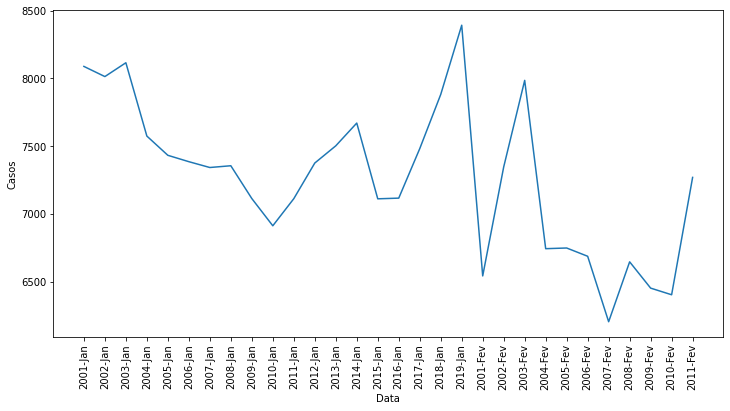

In [6]:
#Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

#Plotando a série temporal
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st[:30])

#Formatando o gráfico
plt.xticks(rotation = 90)

plt.show()

In [7]:
#Obtendo informações sobre o DataFrame
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


In [8]:
#Criando um dicionário dos meses
meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

dados_st["Mês"] = dados_st["Mês"].map(meses_port_ing)
dados_st.sample(5)

,Ano Diagnóstico,Mês,Casos,Data
210,2002,Dec,6809,2002-Dez
46,2009,Mar,8146,2009-Mar
81,2006,May,7593,2006-Mai
161,2010,Sep,7165,2010-Set
162,2011,Sep,7386,2011-Set


In [9]:
#Atualizando a coluna "Data"
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [10]:
#Transformando a string em data
dados_st["Data"] = pd.to_datetime(dados_st["Data"])
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [11]:
#Obtendo informações sobre o DataFrame
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [12]:
#Selecionando as colunas de interesse
dados_st = dados_st[["Data", "Casos"]]
dados_st

,Data,Casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


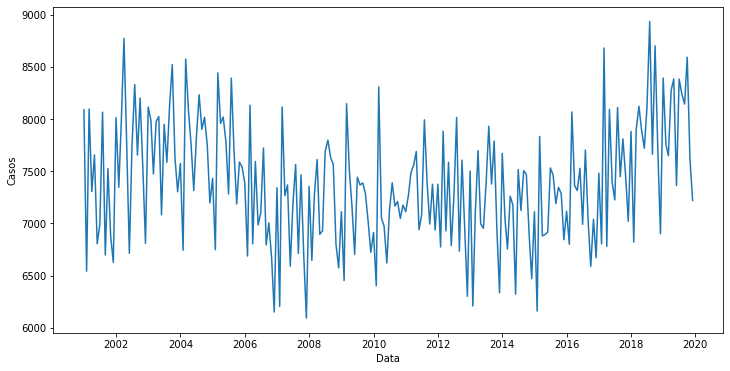

In [13]:
#Plotando o gráfico
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st)

#Formatando o gráfico
plt.xticks(rotation = 0)

plt.show()

In [14]:
#Ordenando os dados pela data e resetando o índice
dados_st.sort_values(by=["Data"], inplace=True)
dados_st.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


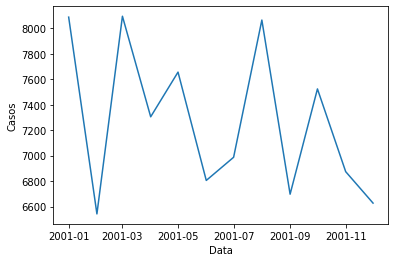

In [15]:
#Plotando o gráfico para 2001
sns.lineplot(x="Data", y="Casos", data=dados_st[:12])

### Desafio 01: Transformar as datas da base de dados em index e realizar os slices feitos em aulas pelas datas

In [16]:
dados_st_data_index = dados_st.set_index("Data")
dados_st_data_index.head()

,Casos
Data,
2001-01-01,8088
2001-02-01,6542
2001-03-01,8095
2001-04-01,7305
2001-05-01,7656


In [17]:
dados_st_data_index.loc["2018-01-01":"2018-12-01"]

,Casos
Data,
2018-01-01,7881
2018-02-01,6821
2018-03-01,7901
2018-04-01,8121
2018-05-01,7892
2018-06-01,7720
2018-07-01,8109
2018-08-01,8934
2018-09-01,7663


### Continuando a aula...

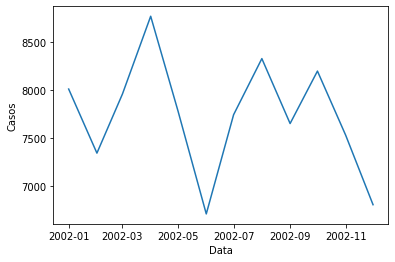

In [18]:
#Plotando o gráfico para 2002
sns.lineplot(x="Data", y="Casos", data=dados_st[12:24])

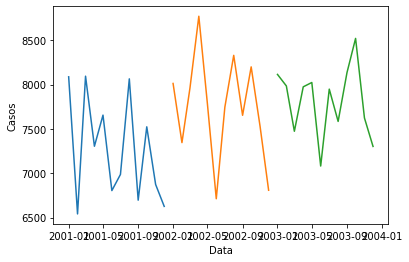

In [19]:
#Plotando o gráfico para 2001, 2002 e 2003
sns.lineplot(x="Data", y="Casos", data=dados_st[:12])
sns.lineplot(x="Data", y="Casos", data=dados_st[12:24])
sns.lineplot(x="Data", y="Casos", data=dados_st[24:36])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


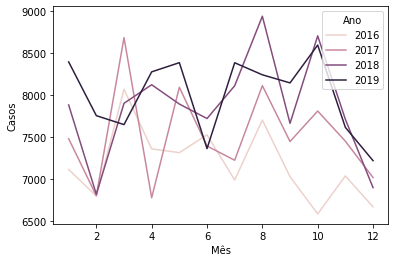

In [20]:
#Separando os anos e os meses e transformado em data
dados_st["Ano"] = dados_st["Data"].dt.year
dados_st["Mês"] = dados_st["Data"].dt.month

#Plotando o gráfico para os 4 últimos anos
sns.lineplot(x="Mês", y="Casos", data=dados_st.query("Ano in [2019, 2018, 2017, 2016]"), hue="Ano")

In [21]:
#Importando a biblioteca
from statsmodels.tsa.seasonal import seasonal_decompose

#Decompondo a série temporal
#Colocando a coluna "Data" como índice
decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


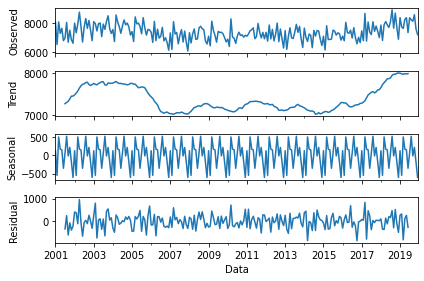

In [22]:
#Plotando os gráficos
decomposicao.plot();

#A decomposição é aditiva
#Somando a curva de tendência e de sazonalidade, deveria resultar na curva original
#Resíduo é o que não é explicado pela sazonalidade e pela tendência

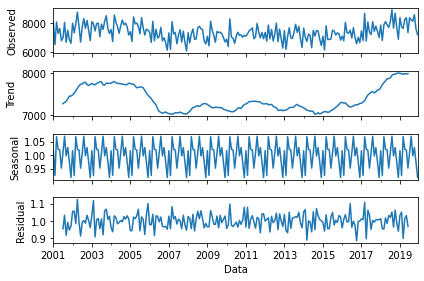

In [23]:
#Decompondo a série temporal
#Colocando a coluna "Data" como índice
#A decomposição agora é multiplicativa e não aditiva
decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"), model = "multiplicative")

#Plotando os gráficos
decomposicao.plot();

#A série temporal está sendo melhor explicada nesse caso

### Base de dados AirPassengers

In [24]:
#Lendo a base de dados
url_passageiros = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv"
dados_passageiros = pd.read_csv(url_passageiros)

In [25]:
#Exibindo a base de dados
dados_passageiros

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [26]:
#Obtendo informações sobre o DataFrame
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [27]:
#Transformando a string em data
dados_passageiros["Month"] = pd.to_datetime(dados_passageiros["Month"])

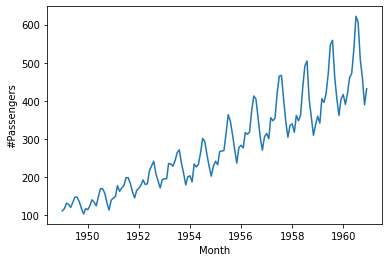

In [28]:
#Plotando o gráfico
sns.lineplot(x="Month", y="#Passengers", data=dados_passageiros)

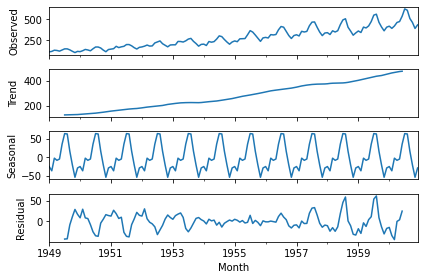

In [29]:
#Decompondo a série temporal
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"))

#Plotando os gráficos
decomposicao_p.plot();

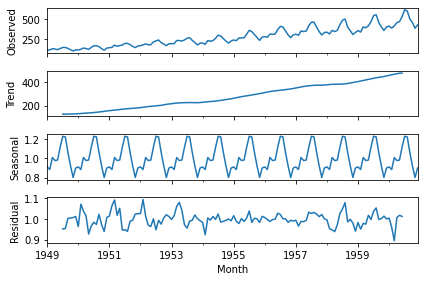

In [30]:
#Decompondo a série temporal
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"), model="multiplicative")

#Plotando os gráficos
decomposicao_p.plot();

### Desafio 02: 
- Formatar os gráficos de decomposição: colocar título e modificar os tamanhos
- Realizar a decomposição de outras séries temporais como a da Hanseníase

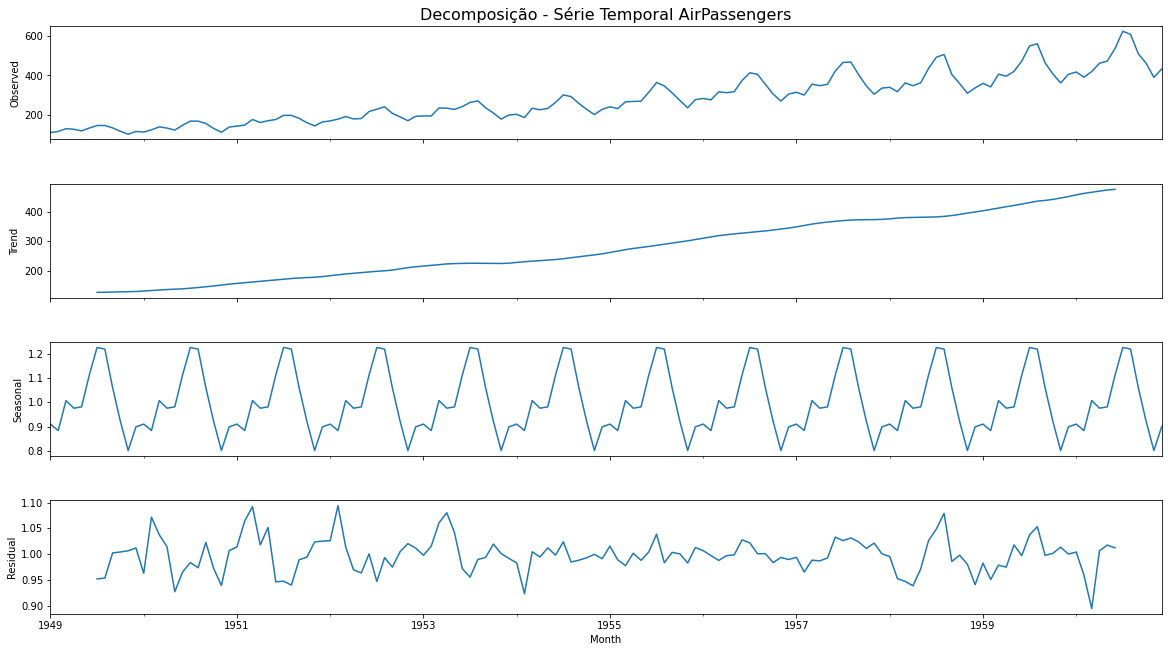

In [31]:
fig_p = decomposicao_p.plot();
fig_p.set_size_inches(18,10)
fig_p.axes[0].set_title("Decomposição - Série Temporal AirPassengers", fontsize=16);

### HANSENÍASE

In [32]:
#Lendo a base de dados
url = "https://raw.githubusercontent.com/claricefiorese/bootcamp_alura_aulas/main/hanseniase_ano_mes_diagnostico.csv"

dados_h = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=10, engine="python")
dados_h.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,<1975,28,8,12,14,14,17,17,14,12,23,21,21,201
1,1975,-,1,-,-,-,-,-,-,-,-,-,1,2
2,1976,-,-,-,2,1,2,-,-,2,-,1,-,8
3,1977,2,-,-,1,-,-,-,-,-,1,1,-,5
4,1978,-,-,-,-,-,2,1,2,-,1,-,-,6


In [33]:
#Deletando a coluna e a linha "Total"
dados_h.drop("Total", axis = 1, inplace=True)
dados_h.drop(46, inplace=True)

In [34]:
#Selecionando as linhas de interesse
dados_h = dados_h.iloc[27:]

In [35]:
#Usando o método melt
dados_hanseniase = dados_h.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")
dados_hanseniase.head()

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,4107
1,2002,Jan,3982
2,2003,Jan,4127
3,2004,Jan,4168
4,2005,Jan,4078


In [36]:
#Convertendo o número de casos para int
dados_hanseniase["Casos"] = dados_hanseniase["Casos"].astype("int64")

In [37]:
meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

dados_hanseniase["Mês"] = dados_hanseniase["Mês"].map(meses_port_ing)
dados_hanseniase.sample(5)

,Ano Diagnóstico,Mês,Casos
116,2003,Jul,4655
34,2016,Feb,2540
62,2006,Apr,3865
102,2008,Jun,3938
56,2019,Mar,2804


In [38]:
dados_hanseniase["Data"] = dados_hanseniase["Ano Diagnóstico"] + "-" + dados_hanseniase["Mês"]
dados_hanseniase

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,4107,2001-Jan
1,2002,Jan,3982,2002-Jan
2,2003,Jan,4127,2003-Jan
3,2004,Jan,4168,2004-Jan
4,2005,Jan,4078,2005-Jan
...,...,...,...,...
223,2015,Dec,2412,2015-Dec
224,2016,Dec,2213,2016-Dec
225,2017,Dec,2448,2017-Dec
226,2018,Dec,2268,2018-Dec


In [39]:
dados_hanseniase["Data"] = pd.to_datetime(dados_hanseniase["Data"])
dados_hanseniase

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,4107,2001-01-01
1,2002,Jan,3982,2002-01-01
2,2003,Jan,4127,2003-01-01
3,2004,Jan,4168,2004-01-01
4,2005,Jan,4078,2005-01-01
...,...,...,...,...
223,2015,Dec,2412,2015-12-01
224,2016,Dec,2213,2016-12-01
225,2017,Dec,2448,2017-12-01
226,2018,Dec,2268,2018-12-01


In [40]:
dados_hanseniase.sort_values(by=["Data"], inplace=True)
dados_hanseniase.reset_index(drop=True, inplace=True)
dados_hanseniase.dropna(inplace=True)

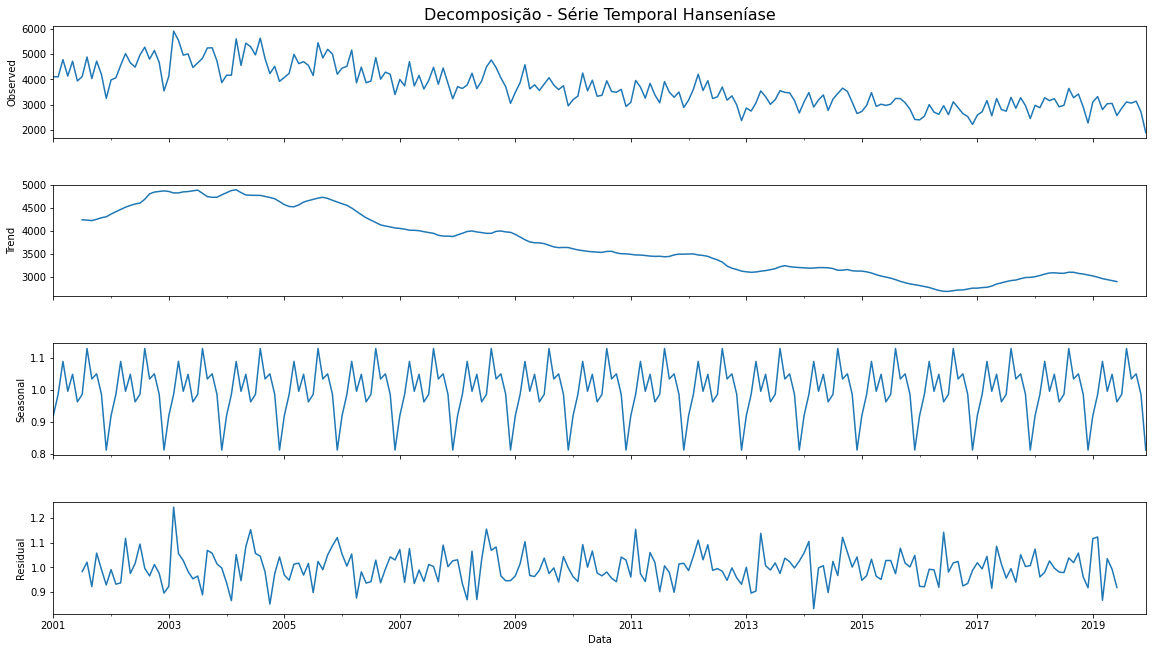

In [41]:
#Decompondo a série temporal
decomposicao_h = seasonal_decompose(dados_hanseniase[["Data", "Casos"]].set_index("Data"), model="multiplicative")

#Plotando os gráficos
fig_h = decomposicao_h.plot();
fig_h.set_size_inches(18,10)
fig_h.axes[0].set_title("Decomposição - Série Temporal Hanseníase", fontsize=16);

### Continuando a aula...

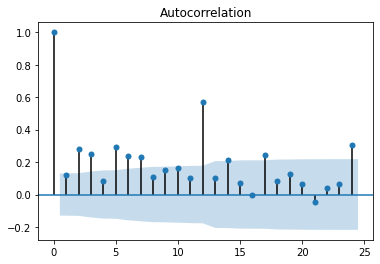

In [42]:
#Importando a biblioteca
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plotando a autocorrelação (de -1 a 1)
#Eixo x é o atraso na análise de correlação (lags)
plot_acf(dados_st["Casos"]);

#O que está dentro do intervalo de confiança são correlações irrelevantes
#Qual a relação da minha série temporal com ela mesma quando ela é deslocada

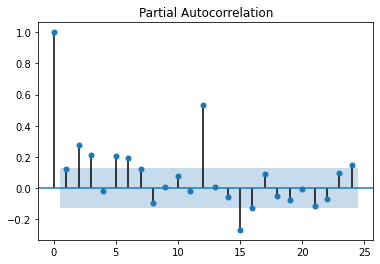

In [43]:
#Plotando a autocorrelação parcial
#É normalizada pela autocorrelação de lag 1
plot_pacf(dados_st["Casos"]);

### Base de dados AirPassengers

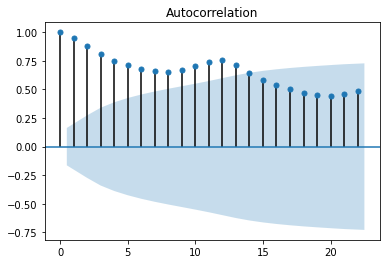

In [44]:
#Plotando a autocorrelação
plot_acf(dados_passageiros["#Passengers"]);

#Valores altos devido a sazonalidade dos dados

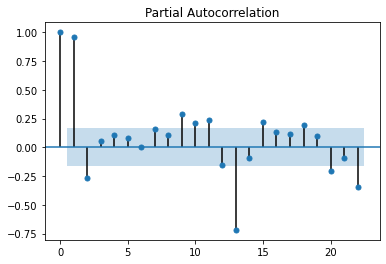

In [45]:
#Plotando a autocorrelação parcial
plot_pacf(dados_passageiros["#Passengers"]);

#Lag 1 com alta correlação, pode indicar grande influência no dia posterior

### Desafio 03: Realizar uma análise de autocorrelação e autocorrelação parcial nos dados da COVID-19, interpretar e discutir no Discord

Este desafio será feito no projeto final deste módulo.